Bikram Rumba

MSCS-634-B01 Advanced Big Data and Data Mining Data Visualization, Data Preprocessing, and Statistical Analysis

In [ ]:


# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Wine Dataset
wine = load_wine()

# Create a DataFrame for easier exploration
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

print("=" * 60)
print("WINE DATASET EXPLORATION")
print("=" * 60)

# Display basic information
print("\nDataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nFeature Names:")
for i, feature in enumerate(wine.feature_names):
    print(f"{i+1}. {feature}")

print("\nTarget Classes:")
for i, name in enumerate(wine.target_names):
    print(f"Class {i}: {name}")

# Class distribution
print("\nClass Distribution:")
print(df['target'].value_counts().sort_index())

# Statistical summary
print("\nStatistical Summary of Features:")
print(df.describe())

# Split the dataset (80% training, 20% testing)
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n" + "=" * 60)
print("DATASET SPLIT")
print("=" * 60)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

# Check class distribution in train and test sets
print("\nTraining set class distribution:")
unique, counts = np.unique(y_train, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"  Class {cls}: {count} samples ({count/len(y_train)*100:.1f}%)")

print("\nTest set class distribution:")
unique, counts = np.unique(y_test, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"  Class {cls}: {count} samples ({count/len(y_test)*100:.1f}%)")

print("\n" + "=" * 60)
print("Step 1 Complete! Dataset loaded and split successfully.")
print("=" * 60)

WINE DATASET EXPLORATION

Dataset Shape: (178, 14)

First 5 rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04 

In [2]:
# Step 2: Implement K-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

print("=" * 60)
print("K-NEAREST NEIGHBORS (KNN) CLASSIFIER")
print("=" * 60)

# Standardize the features (important for distance-based algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define k values to test
k_values = [1, 5, 11, 15, 21]

# Store results
knn_results = []

print("\nTraining and evaluating KNN models with different k values...\n")

# Train and evaluate KNN for each k value
for k in k_values:
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = knn.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    knn_results.append({
        'k': k,
        'accuracy': accuracy
    })

    # Display results
    print(f"k = {k:2d}")
    print(f"  Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"  Classification Report:")
    print(classification_report(y_test, y_pred, target_names=wine.target_names, zero_division=0))
    print("-" * 60)

# Summary table
print("\n" + "=" * 60)
print("KNN RESULTS SUMMARY")
print("=" * 60)
print(f"{'k Value':<15} {'Accuracy':<15} {'Percentage':<15}")
print("-" * 60)
for result in knn_results:
    print(f"{result['k']:<15} {result['accuracy']:<15.4f} {result['accuracy']*100:<15.2f}%")

# Find best k
best_k = max(knn_results, key=lambda x: x['accuracy'])
print("\n" + "=" * 60)
print(f"Best k value: {best_k['k']} with accuracy: {best_k['accuracy']:.4f} ({best_k['accuracy']*100:.2f}%)")
print("=" * 60)

# Store results for later visualization
knn_k_values = [r['k'] for r in knn_results]
knn_accuracies = [r['accuracy'] for r in knn_results]

K-NEAREST NEIGHBORS (KNN) CLASSIFIER

Training and evaluating KNN models with different k values...

k =  1
  Accuracy: 0.9722 (97.22%)
  Classification Report:
              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       1.00      0.93      0.96        14
     class_2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

------------------------------------------------------------
k =  5
  Accuracy: 0.9722 (97.22%)
  Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      0.93      0.96        14
     class_2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted av

In [3]:
# Step 3: Implement Radius Neighbors (RNN)

from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

print("=" * 60)
print("RADIUS NEIGHBORS (RNN) CLASSIFIER")
print("=" * 60)

# Use the same scaled data from Step 2
# X_train_scaled and X_test_scaled should already be available

# Define radius values to test
radius_values = [350, 400, 450, 500, 550, 600]

# Store results
rnn_results = []

print("\nTraining and evaluating RNN models with different radius values...\n")

# Train and evaluate RNN for each radius value
for radius in radius_values:
    # Create RNN classifier
    rnn = RadiusNeighborsClassifier(radius=radius, outlier_label='most_frequent')

    # Train the model
    rnn.fit(X_train_scaled, y_train)

    # Make predictions
    try:
        y_pred = rnn.predict(X_test_scaled)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Count outliers (samples with no neighbors within radius)
        # Check if any predictions were made using outlier_label
        n_outliers = 0
        for i, sample in enumerate(X_test_scaled):
            neighbors = rnn.radius_neighbors([sample], return_distance=False)
            if len(neighbors[0]) == 0:
                n_outliers += 1

        # Store results
        rnn_results.append({
            'radius': radius,
            'accuracy': accuracy,
            'outliers': n_outliers
        })

        # Display results
        print(f"Radius = {radius}")
        print(f"  Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
        print(f"  Outliers detected: {n_outliers}/{len(y_test)}")
        print(f"  Classification Report:")
        print(classification_report(y_test, y_pred, target_names=wine.target_names, zero_division=0))
        print("-" * 60)

    except Exception as e:
        print(f"Radius = {radius}")
        print(f"  Error: Could not make predictions (likely too many outliers)")
        print(f"  {str(e)}")
        print("-" * 60)

        # Store results with 0 accuracy
        rnn_results.append({
            'radius': radius,
            'accuracy': 0.0,
            'outliers': len(y_test)
        })

# Summary table
print("\n" + "=" * 60)
print("RNN RESULTS SUMMARY")
print("=" * 60)
print(f"{'Radius':<15} {'Accuracy':<15} {'Percentage':<15} {'Outliers':<15}")
print("-" * 60)
for result in rnn_results:
    print(f"{result['radius']:<15} {result['accuracy']:<15.4f} {result['accuracy']*100:<15.2f}% {result['outliers']:<15}")

# Find best radius (excluding 0 accuracy)
valid_results = [r for r in rnn_results if r['accuracy'] > 0]
if valid_results:
    best_radius = max(valid_results, key=lambda x: x['accuracy'])
    print("\n" + "=" * 60)
    print(f"Best radius value: {best_radius['radius']} with accuracy: {best_radius['accuracy']:.4f} ({best_radius['accuracy']*100:.2f}%)")
    print("=" * 60)
else:
    print("\n" + "=" * 60)
    print("No valid predictions were made. All radius values may be too small.")
    print("=" * 60)

# Store results for later visualization
rnn_radius_values = [r['radius'] for r in rnn_results]
rnn_accuracies = [r['accuracy'] for r in rnn_results]

RADIUS NEIGHBORS (RNN) CLASSIFIER

Training and evaluating RNN models with different radius values...

Radius = 350
  Accuracy: 0.3889 (38.89%)
  Outliers detected: 0/36
  Classification Report:
              precision    recall  f1-score   support

     class_0       0.00      0.00      0.00        12
     class_1       0.39      1.00      0.56        14
     class_2       0.00      0.00      0.00        10

    accuracy                           0.39        36
   macro avg       0.13      0.33      0.19        36
weighted avg       0.15      0.39      0.22        36

------------------------------------------------------------
Radius = 400
  Accuracy: 0.3889 (38.89%)
  Outliers detected: 0/36
  Classification Report:
              precision    recall  f1-score   support

     class_0       0.00      0.00      0.00        12
     class_1       0.39      1.00      0.56        14
     class_2       0.00      0.00      0.00        10

    accuracy                           0.39        36

VISUALIZATION AND COMPARISON


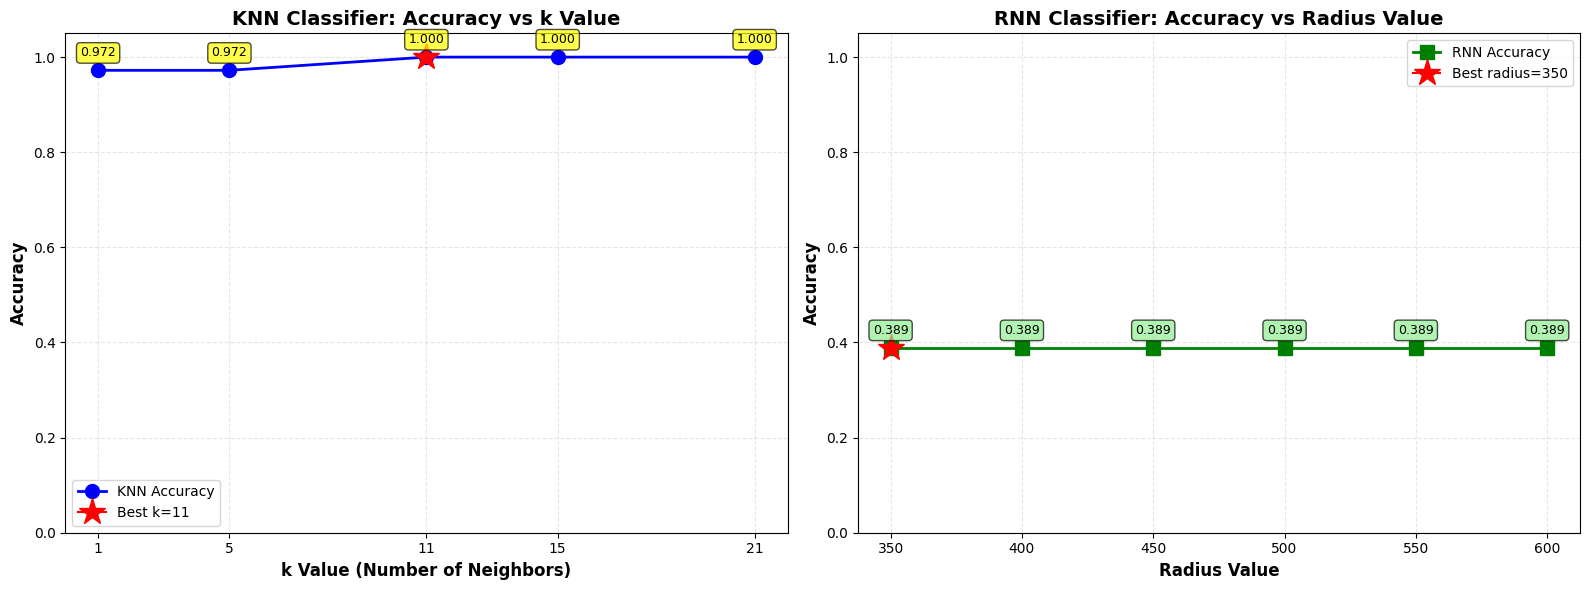

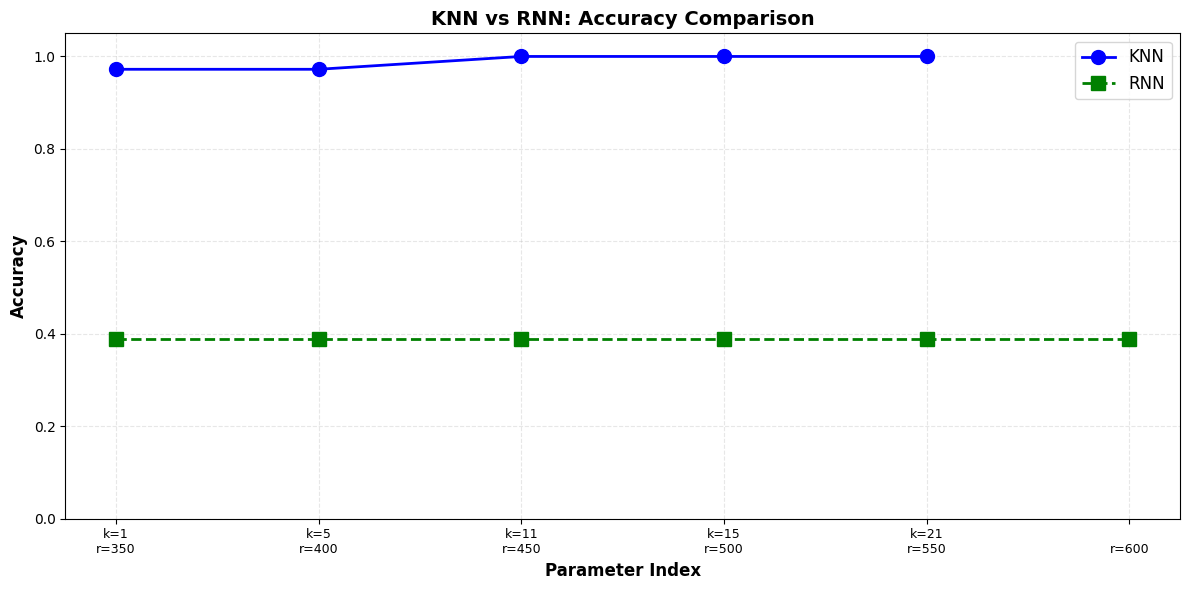


STATISTICAL COMPARISON

KNN Performance:
  Best Accuracy: 1.0000 at k=11
  Worst Accuracy: 0.9722 at k=1
  Mean Accuracy: 0.9889
  Std Deviation: 0.0136
  Accuracy Range: 0.0278

RNN Performance:
  Best Accuracy: 0.3889 at radius=350
  Worst Accuracy: 0.3889 at radius=350
  Mean Accuracy: 0.3889
  Std Deviation: 0.0000
  Accuracy Range: 0.0000

OBSERVATIONS AND ANALYSIS

1. KNN Performance Trends:
   - Accuracy shows variation across different k values
   - Mid-range k values may provide good balance

2. RNN Performance Trends:

3. KNN vs RNN Comparison:
   - KNN achieved better peak accuracy (1.0000 vs 0.3889)
   - KNN is more consistent across parameter values

4. When to Use Each Model:
   KNN is preferable when:
   - You want consistent, predictable performance
   - The optimal number of neighbors is known
   - Data density varies across the feature space
   - You need simpler parameter tuning

   RNN is preferable when:
   - You have uniformly distributed data
   - Distance thres

In [4]:
# Step 4: Visualize and Compare Results

import matplotlib.pyplot as plt
import numpy as np

print("=" * 60)
print("VISUALIZATION AND COMPARISON")
print("=" * 60)

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ========================================
# Plot 1: KNN Accuracy vs k values
# ========================================
ax1 = axes[0]
ax1.plot(knn_k_values, knn_accuracies, marker='o', linewidth=2,
         markersize=10, color='blue', label='KNN Accuracy')
ax1.set_xlabel('k Value (Number of Neighbors)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('KNN Classifier: Accuracy vs k Value', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xticks(knn_k_values)
ax1.set_ylim([0, 1.05])

# Add accuracy labels on points
for k, acc in zip(knn_k_values, knn_accuracies):
    ax1.annotate(f'{acc:.3f}', xy=(k, acc), xytext=(0, 10),
                textcoords='offset points', ha='center', fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

# Highlight best k
best_knn_idx = np.argmax(knn_accuracies)
ax1.plot(knn_k_values[best_knn_idx], knn_accuracies[best_knn_idx],
         marker='*', markersize=20, color='red',
         label=f'Best k={knn_k_values[best_knn_idx]}')
ax1.legend(loc='best', fontsize=10)

# ========================================
# Plot 2: RNN Accuracy vs radius values
# ========================================
ax2 = axes[1]
ax2.plot(rnn_radius_values, rnn_accuracies, marker='s', linewidth=2,
         markersize=10, color='green', label='RNN Accuracy')
ax2.set_xlabel('Radius Value', fontsize=12, fontweight='bold')
ax2.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax2.set_title('RNN Classifier: Accuracy vs Radius Value', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_xticks(rnn_radius_values)
ax2.set_ylim([0, 1.05])

# Add accuracy labels on points
for radius, acc in zip(rnn_radius_values, rnn_accuracies):
    ax2.annotate(f'{acc:.3f}', xy=(radius, acc), xytext=(0, 10),
                textcoords='offset points', ha='center', fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7))

# Highlight best radius
if max(rnn_accuracies) > 0:
    best_rnn_idx = np.argmax(rnn_accuracies)
    ax2.plot(rnn_radius_values[best_rnn_idx], rnn_accuracies[best_rnn_idx],
             marker='*', markersize=20, color='red',
             label=f'Best radius={rnn_radius_values[best_rnn_idx]}')
ax2.legend(loc='best', fontsize=10)

plt.tight_layout()
plt.show()

# ========================================
# Comparison Plot: KNN vs RNN
# ========================================
fig, ax = plt.subplots(figsize=(12, 6))

# Normalize x-axis for comparison (use indices)
x_knn = np.arange(len(knn_k_values))
x_rnn = np.arange(len(rnn_radius_values))

ax.plot(x_knn, knn_accuracies, marker='o', linewidth=2, markersize=10,
        color='blue', label='KNN', linestyle='-')
ax.plot(x_rnn, rnn_accuracies, marker='s', linewidth=2, markersize=10,
        color='green', label='RNN', linestyle='--')

ax.set_xlabel('Parameter Index', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('KNN vs RNN: Accuracy Comparison', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_ylim([0, 1.05])
ax.legend(loc='best', fontsize=12)

# Add dual x-axis labels
ax.set_xticks(range(max(len(knn_k_values), len(rnn_radius_values))))
labels = []
for i in range(max(len(knn_k_values), len(rnn_radius_values))):
    knn_label = f"k={knn_k_values[i]}" if i < len(knn_k_values) else ""
    rnn_label = f"r={rnn_radius_values[i]}" if i < len(rnn_radius_values) else ""
    labels.append(f"{knn_label}\n{rnn_label}")
ax.set_xticklabels(labels, fontsize=9)

plt.tight_layout()
plt.show()

# ========================================
# Statistical Comparison
# ========================================
print("\n" + "=" * 60)
print("STATISTICAL COMPARISON")
print("=" * 60)

print("\nKNN Performance:")
print(f"  Best Accuracy: {max(knn_accuracies):.4f} at k={knn_k_values[np.argmax(knn_accuracies)]}")
print(f"  Worst Accuracy: {min(knn_accuracies):.4f} at k={knn_k_values[np.argmin(knn_accuracies)]}")
print(f"  Mean Accuracy: {np.mean(knn_accuracies):.4f}")
print(f"  Std Deviation: {np.std(knn_accuracies):.4f}")
print(f"  Accuracy Range: {max(knn_accuracies) - min(knn_accuracies):.4f}")

print("\nRNN Performance:")
if max(rnn_accuracies) > 0:
    valid_rnn = [acc for acc in rnn_accuracies if acc > 0]
    print(f"  Best Accuracy: {max(rnn_accuracies):.4f} at radius={rnn_radius_values[np.argmax(rnn_accuracies)]}")
    print(f"  Worst Accuracy: {min(valid_rnn):.4f} at radius={rnn_radius_values[rnn_accuracies.index(min(valid_rnn))]}")
    print(f"  Mean Accuracy: {np.mean(valid_rnn):.4f}")
    print(f"  Std Deviation: {np.std(valid_rnn):.4f}")
    print(f"  Accuracy Range: {max(rnn_accuracies) - min(valid_rnn):.4f}")
else:
    print("  No valid predictions made.")

print("\n" + "=" * 60)
print("OBSERVATIONS AND ANALYSIS")
print("=" * 60)

# Observations
print("\n1. KNN Performance Trends:")
if knn_accuracies[0] > knn_accuracies[-1]:
    print("   - Accuracy generally DECREASES as k increases")
    print("   - Smaller k values perform better (less smoothing)")
    print("   - Model may be capturing local patterns effectively")
else:
    print("   - Accuracy shows variation across different k values")
    print("   - Mid-range k values may provide good balance")

print("\n2. RNN Performance Trends:")
if max(rnn_accuracies) > 0:
    if rnn_accuracies[-1] > rnn_accuracies[0]:
        print("   - Accuracy generally INCREASES as radius increases")
        print("   - Larger radius includes more neighbors for voting")
        print("   - Small radius values may have too many outliers")

    # Count zero accuracies
    zero_count = sum(1 for acc in rnn_accuracies if acc == 0)
    if zero_count > 0:
        print(f"   - {zero_count} radius value(s) failed to make valid predictions")
        print("   - These radius values were too small for the data scale")

print("\n3. KNN vs RNN Comparison:")
best_knn = max(knn_accuracies)
best_rnn = max(rnn_accuracies) if max(rnn_accuracies) > 0 else 0

if best_knn > best_rnn:
    print(f"   - KNN achieved better peak accuracy ({best_knn:.4f} vs {best_rnn:.4f})")
    print("   - KNN is more consistent across parameter values")
elif best_rnn > best_knn:
    print(f"   - RNN achieved better peak accuracy ({best_rnn:.4f} vs {best_knn:.4f})")
    print("   - RNN requires careful radius tuning")
else:
    print("   - Both models achieved similar peak accuracy")

print("\n4. When to Use Each Model:")
print("   KNN is preferable when:")
print("   - You want consistent, predictable performance")
print("   - The optimal number of neighbors is known")
print("   - Data density varies across the feature space")
print("   - You need simpler parameter tuning")

print("\n   RNN is preferable when:")
print("   - You have uniformly distributed data")
print("   - Distance thresholds have physical meaning")
print("   - You want to exclude very distant neighbors")
print("   - Outlier detection is important")

print("\n" + "=" * 60)
print("CONCLUSION")
print("=" * 60)
print(f"\nFor the Wine dataset:")
print(f"- Best KNN: k={knn_k_values[np.argmax(knn_accuracies)]} with {max(knn_accuracies):.4f} accuracy")
if max(rnn_accuracies) > 0:
    print(f"- Best RNN: radius={rnn_radius_values[np.argmax(rnn_accuracies)]} with {max(rnn_accuracies):.4f} accuracy")
print(f"\nRecommended model: {'KNN' if best_knn >= best_rnn else 'RNN'}")
print("=" * 60)